In [248]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math as m
import tools as tls


def magnetization(grid):
    N_up = 0
    N_down = 0
    for i in range(len(grid)):
        for j in range(len(grid)):
            if grid[i][j] > 0:
                N_up += 1
            else:
                N_down += 1
    M = (N_up - N_down)/len(grid)**2

    return M
        


def f(delta_energy, T):
    """Probability density function based on Boltzmann distibution"""
    return m.exp(- delta_energy/T)


# def energy_k(grid,k,external_field):
#     row, column = position_cal(k,grid)
#     sum_spin = 0
#     for i in range(len(grid)):
#         for j in range(len(grid)):
#             sum_spin += grid[i][j]
#     E_k = - (sum_spin - grid[row][column]) * grid[row][column] - external_field*grid[row][column]
    
#     return E_k


def energy_k(grid,k,external_field,J):
    row, column = position_cal(k,grid)
    sum_spin = 0
     ## Only accepting adjacent neighbors, not diagonal neighbors
    N = len(grid)
    sum_spin += grid[row,(column+1)%N]   + grid[row,(column-1)%N]  +  grid[(row+1)%N,column]   +  grid[(row-1)%N,column]
    sum_spin *= 1/2  ## Avoids double counting
    E_k =  -J* sum_spin* grid[row][column] - external_field*grid[row][column]
    
    return E_k

def energy_total(grid,external_field):
    E_total = 0
    for i in range(len(grid)**2):
        E_i = energy_k(grid,i,external_field)
        E_total += E_i
        
    return E_total

# def spin_flip(grid,k):
#     N = len(grid)
#     grid_flip = []
#     row, column = position_cal(k,grid)
#     for i in range(N):
#         grid_flip.append([])
#         for j in range(N):
#             n = grid[i][j]
#             if [i,j] == [row, column]:
#                 n = -n
#             grid_flip[i].append(n)

#     return grid_flip

def spin_flip(grid,k):
    row, column = position_cal(k,grid)
    grid_flip = np.copy(grid)
    grid_flip[row][column] *= -1
    return grid_flip


def position_cal(k, grid):
    size = len(grid)
    row = int(np.floor(k/size))
    column = k - row*size
    
    return row,column

def solve_metropolis(T, grid, trials, change_temperature, T_change_amount, external_field, J):
    # Assume the gird is a N by N array with value either +1 or -1
    # Assume the magnetic coupling constant J = 1
    # Assume the Boltzmann constant k = 1
    accept = 0  
    N = len(grid)

    # Define the out put quantity
    magnetizationData = []
    avg_energy = []
    correlation_function = []
    specific_heat = []

    oldGrids = []
    
    
#     # For an assigned spin, to calculate the correlation function
#     r = 3
#     i = 10
#     j = i - r
#     # Calculate the position information of sigma_i and sigma_j
#     row_i,column_i = position_cal(i, grid)
#     row_j,column_j = position_cal(j, grid)
    print('This is working')
    for p in range(trials):
#         E_assign = []
#         M_assign = []
#         spin_i_assign = []
#         spin_j_assign = []
            
        ### Create a check to run 10 times during the process
        if p%(np.floor(trials/20))==0:
            currentMag = magnetization(grid)
            magnetizationData += [currentMag]
            oldGrids += [grid]
            print('After',p,'trials, the current magnetization is: M =',currentMag)
#         if change_temperature == "False":
#             pass
#         else:
#             T +=  T_change_amount
#         for i in range(150):
        # Select via random vertexes
        k = random.randint(0,N**2-1)

        
        delta_E = -2* energy_k(grid,k,external_field,J) #- energy_k(grid,k,external_field)
        if(delta_E < 0 or f(delta_E, T) >= np.random.uniform(0,1)):
            grid_flip = spin_flip(grid,k)
            grid = grid_flip
            accept += 1
        else:
            pass
#             E_assign.append(energy_total(grid,external_field))
#             M_assign.append(tls.magnetization(grid))
#             spin_i_assign.append(grid[row_i][column_i])
#             spin_j_assign.append(grid[row_j][column_j])
#         correlation_function.append(tls.correlation_function(spin_i_assign,spin_j_assign, E_assign, T))
#         avg_energy.append(tls.exp_value(E_assign,E_assign,T))
#         magnetization.append(tls.exp_value(E_assign, M_assign, T))
#         specific_heat.append(tls.specific_heat(E_assign, T))
        
    print("Change temperature: {} \n".format(change_temperature))
    print("Temperature changed amount: {} \n".format(T_change_amount))
    print("Total numbers of attempts: {} \n".format(trials))
    print("Numbers of successful flips: {} \n".format(accept))
    print("Numbers of failed flips: {} \n".format(trials - accept))
    
    oldGrids += [grid]
    return [grid, magnetizationData, oldGrids]

#     return grid, avg_energy, magnetization, specific_heat, correlation_function





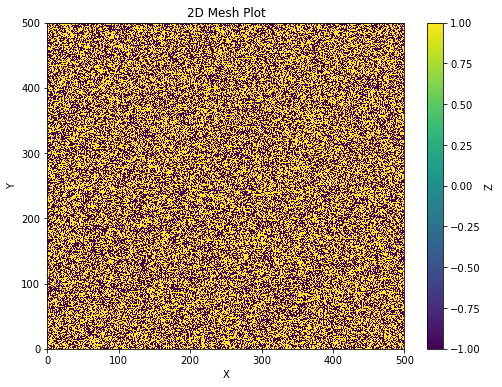

0.0014


In [289]:
grid = np.zeros((500,500))
for ii in range(len(grid)):
    for jj in range(len(grid[ii])):
        grid[ii][jj] = random.choice([-1, 1])
plt.figure(figsize=(8, 6))
plt.pcolormesh(grid, cmap='viridis')
plt.colorbar(label='Z')
plt.title('2D Mesh Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(magnetization(grid))

In [290]:
T = 1.25; trials = len(grid)**2 * 50; ct = False; Ta = 5; B =.025; J =2

In [291]:
data = solve_metropolis(T, grid, trials, ct, Ta, B, J)

This is working
After 0 trials, the current magnetization is: M = 0.0014
After 625000 trials, the current magnetization is: M = 0.051912
After 1250000 trials, the current magnetization is: M = 0.086512
After 1875000 trials, the current magnetization is: M = 0.11816
After 2500000 trials, the current magnetization is: M = 0.1442
After 3125000 trials, the current magnetization is: M = 0.166696
After 3750000 trials, the current magnetization is: M = 0.183688
After 4375000 trials, the current magnetization is: M = 0.201264
After 5000000 trials, the current magnetization is: M = 0.218136
After 5625000 trials, the current magnetization is: M = 0.23124
After 6250000 trials, the current magnetization is: M = 0.246856
After 6875000 trials, the current magnetization is: M = 0.258448
After 7500000 trials, the current magnetization is: M = 0.273056
After 8125000 trials, the current magnetization is: M = 0.285928
After 8750000 trials, the current magnetization is: M = 0.296288
After 9375000 trials, 

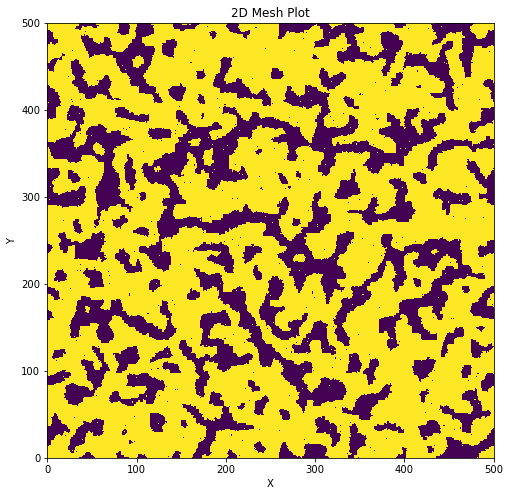

In [292]:
grid_T = data[0]
plt.figure(figsize=(8, 8))
plt.pcolormesh(grid_T, cmap='viridis')
# plt.colorbar(label='Z')
# plt.title('2D Mesh Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

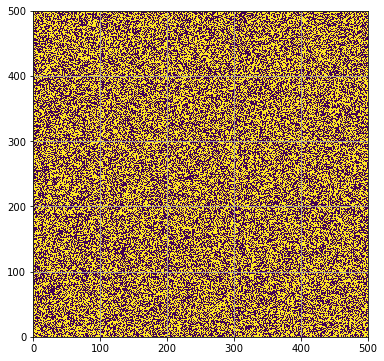

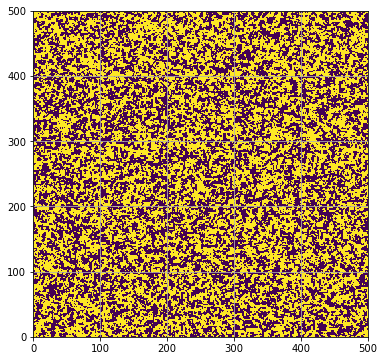

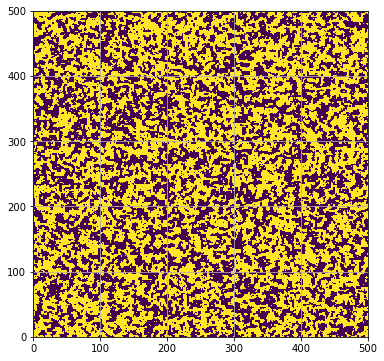

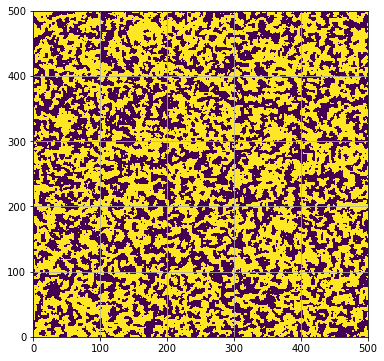

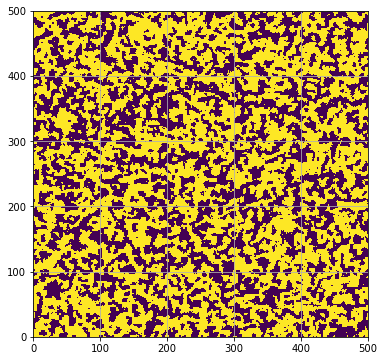

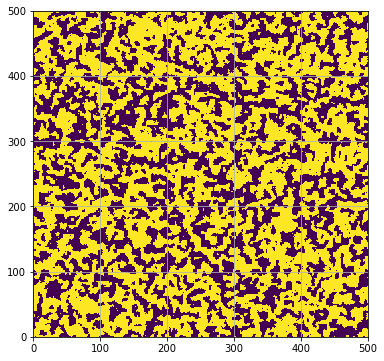

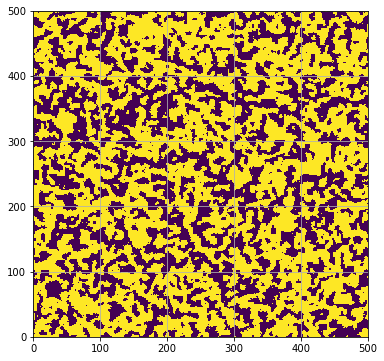

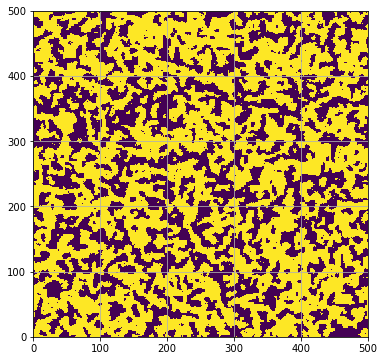

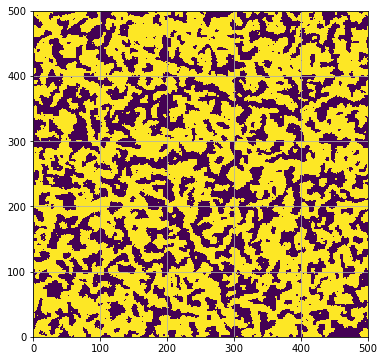

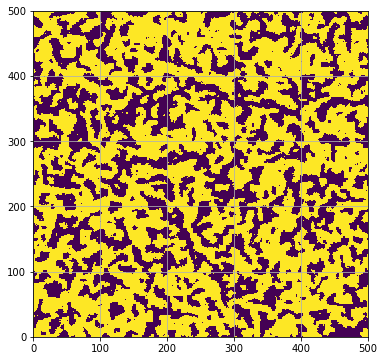

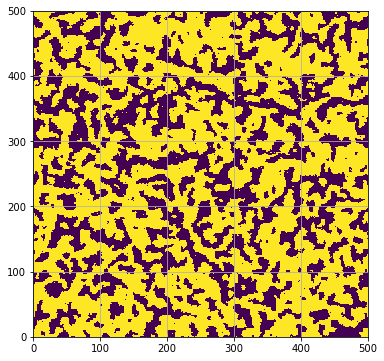

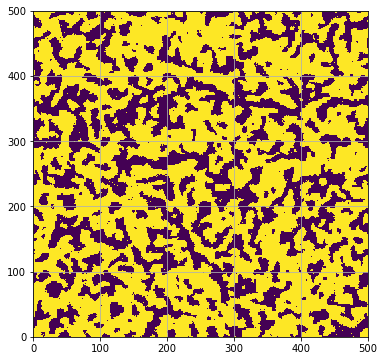

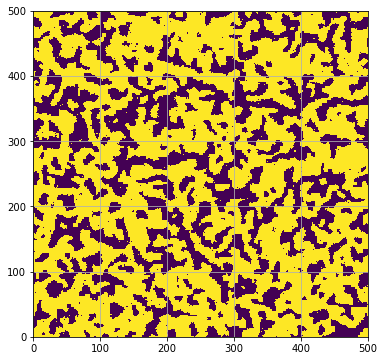

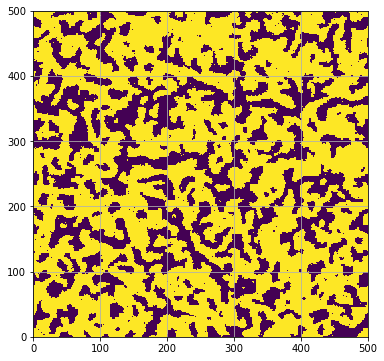

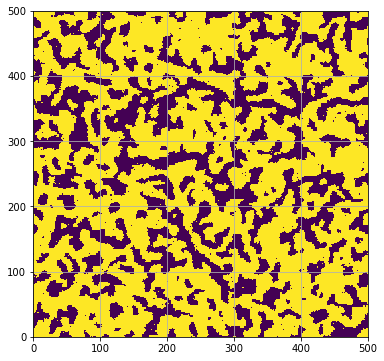

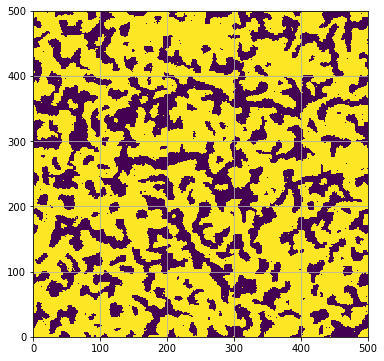

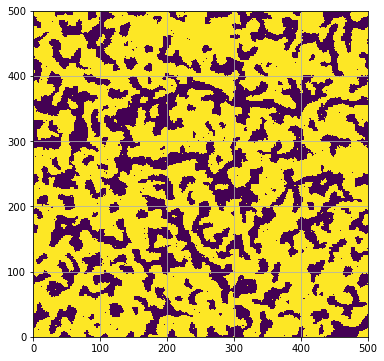

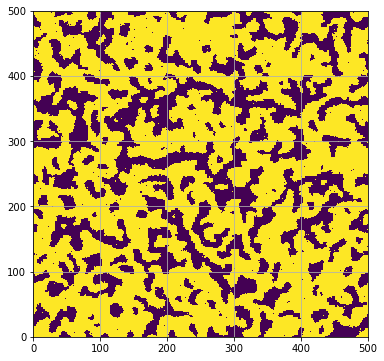

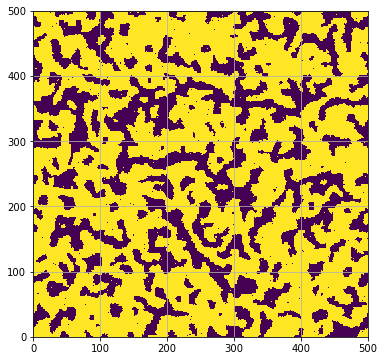

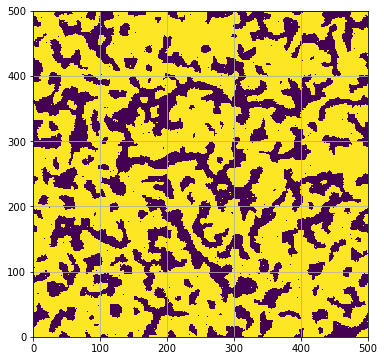

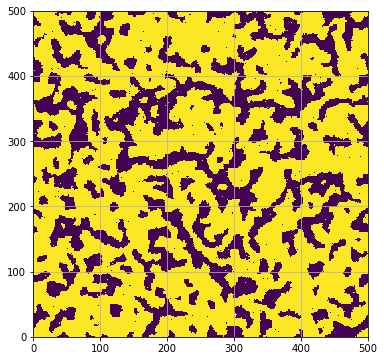

In [295]:
# Create separate plots for each set of data
for i, dataTable in enumerate(data[2], start=1):

    plt.figure(figsize=(6, 6))
    plt.pcolormesh(dataTable, cmap='viridis')
    plt.grid(True)
    plt.show()

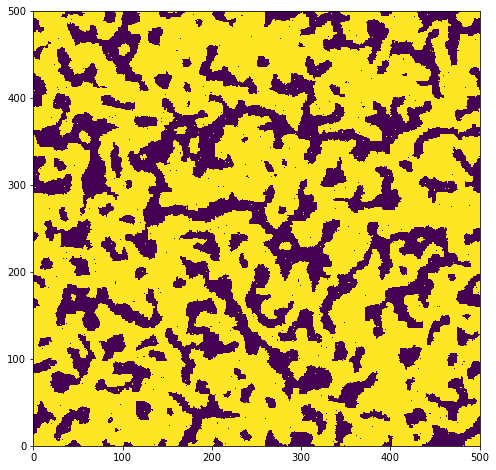

In [296]:
grid_T = data[0]
plt.figure(figsize=(8, 8))
plt.pcolormesh(grid_T, cmap='viridis')
# plt.colorbar(label='Z')
# plt.title('2D Mesh Plot')
# plt.xlabel('X')
# plt.ylabel('Y')
plt.show()